# Text Classification Using Neural Network

**Data:** "Movie review" IMDB Dataset

**Steps**
- Load dataset from csv file
- Pre-process data
- Create training and test dataset
- Tokenize the sequences
- Explore the tokenization
- Create a neural network
- Train model and make predictions
- Explore model performance

In [1]:
# importing packages
import matplotlib.pyplot as plt
import io
import os
import re
import shutil
import string
import tensorflow as tf
import pandas as pd
import numpy as np
import timeit, time

from tensorflow.keras import layers
from tensorflow.keras import losses 
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [2]:
# reading 50,000 movie reviews labeled as "positive" or "negative"
df = pd.read_csv("./data/IMDB Dataset.csv")

In [3]:
# mapping the sentiment (target variable) to numbers
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative":0})

In [4]:
# checking first row
df.head(1)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",1


In [5]:
# getting the shape of the df
df.shape

(50000, 2)

## Pre-processing the Data

- Convert to lower case
- Remove html tags if found
- Remove puncutations   

In [6]:
# definig function to pre-process the data
def preprocess_data(input_data):
    lowercase = input_data.lower()
    stripped_html = lowercase.replace('<br />', ' ')
    retval = re.sub(r'[^\w\s]','', stripped_html)
    return retval

In [7]:
# preprocessing the review column
df['review'] = df['review'].map(preprocess_data)

In [8]:
# checking first rows
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictures painted for mainstream audiences forget charm forget romanceoz doesnt mess around the first episode i ever saw struck me as so nasty it was surreal i couldnt say i was ready for it but as i watched more i developed a taste for oz and got accustomed to the high levels of graphic violence not just violence but injustice crooked guards wholl be sold out for a nickel inmates wholl kill on order and get away with it well mannered middle class inmates being turned into prison bitches due to their lack of street skills or prison experience watching oz you may become comfortable with what is uncomfortable viewingthats if you can get in touch with your darker side,1
1,a wonderful little production the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done,1
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point 2 risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to love this was the most id laughed at one of woodys comedies in years dare i say a decade while ive never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young woman this may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends,1
3,basically theres a family where a little boy jake thinks theres a zombie in his closet his parents are fighting all the time this movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombie ok first of all when youre going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing arguing like in real life and then we have jake with his closet which totally ruins all the film i expected to

## Creating Training and Test datasets

In [9]:
# defining train and test dfs
X_train = df["review"].values[:25000]
X_test = df["review"].values[25000:]

y_train = df["sentiment"].values[:25000]
y_test  = df["sentiment"].values[25000:]

In [10]:
X_train.shape

(25000,)

In [11]:
X_test.shape

(25000,)

In [12]:
y_train.shape

(25000,)

In [13]:
X_train[0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with me  the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word  it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far away  i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty 

In [14]:
y_train[0]

1

## Tokenize

In [15]:
# defining hyper parameters that can be modified
vocab_size = 10000
embedding_dim = 16
# for a sentence shorter than max_length it will be padded 
# longer sentences will be truncated
max_length = 250  

In [16]:
# using "Out of Vocabulary" token rather than throwing away unknown words
tokenizer = Tokenizer(num_words=10000, oov_token = "<oov>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [17]:
# converting words to numbers and pad for the neural network to use as input
# if the sequence length is greater than max length then truncate it at the end
# if the sequence length is less than max length then pad it at the end
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, maxlen=max_length, 
                             padding = "post", truncating="post")


# tokenized using the word_index learned from the training data
testing_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(testing_sequences, maxlen=max_length, 
                            padding = "post", truncating="post")

In [18]:
train_padded[1]

array([   4,  375,  112,  352,    2, 1342, 2947,    7,   52,    1,   52,
          1, 1604,    3,  397,    4,    1,    3,  505,    1,  281,    5,
       1853,    6,    2,  430,  405,    2,  147,   23,  534,   70, 2140,
        526, 4553,   21,   61,   45,  188,   31,    2,    1,   18,   27,
         45,   31,    2, 2288,  180, 3183,   99,   22,   67,  351,   64,
          2,    1,  784, 9328,   32,    2, 1793,    6, 1844, 7523, 6409,
         21,   61,    7,    9,   70,  266,    2,  146,   18,    9,    7,
          4,    1,  440,    3, 2329,  405,    4, 4253,  352,   42,   28,
          5,    2,   84, 3199,    5,  215,    3,   24,  119,    2, 1853,
         63,  264,  347,   15,    2,  112,  176,    2, 1114,    5,    2,
       3034,   60,  239,   71,  336,    2, 2011, 1025, 3129, 1206, 1169,
         91, 4830,    9,  300,   20,  250, 1751,    3,  250, 4178,  566,
         15,    2,  131, 3747,    1,    3,    1,    3,    2,  688,  566,
          5,   62, 1066,   15,    1,    1,    1,  1

# Explore Tokenization

In [19]:
# reversing keys: keys become the values, and values become the keys so that 
# we can look a word up (display padded as ?)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

# this is what will be fed in
print(decode_review(train_padded[1]))

a wonderful little production the filming technique is very <oov> very <oov> fashion and gives a <oov> and sometimes <oov> sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the <oov> but he has all the voices down pat too you can truly see the <oov> editing guided by the references to williams diary entries not only is it well worth the watching but it is a <oov> written and performed piece a masterful production about one of the great masters of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning <oov> and <oov> and the sets particularly of their flat with <oov> <oov> <oov> every surface are terribly well done ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? 

In [20]:
# this is the original text
print(X_train[1])

a wonderful little production   the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece   the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life   the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done


## Creating Model

**Model Parameters**

`Embedding`

- Embedding layer stores one vector per word
- Converts sequences of word indices to sequences of vectors
- These vectors are trainable
- Once trained, words with similar meanings often have similar vectors
- This approach is more efficient than using a dense layer with one hot encoding

`GlobalAveragePooling1D`

- Returns a fixed length output vector for each example by averaging over the sequence dimension
- Allows the model to handle input of variable length</li>

`Couple of Dense layers`

- Apply the dense layer with ReLU activation</li>

The last output layer use sigmoid to get probability of positive or negative sentiment


In [21]:
# creating model
model = tf.keras.Sequential([
    # the "Embedding" layer is the key to text sentiment analysis
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [22]:
# compiling model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2176      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 1032      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 163,217
Trainable params: 163,217
Non-trainable params: 0
_________________________________________________________________


In [23]:
# measuring time taken to train the model
start = timeit.default_timer()

In [24]:
history = model.fit(train_padded, y_train, epochs=5, validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 2s 84us/sample - loss: 0.4398 - accuracy: 0.7895 - val_loss: 0.3410 - val_accuracy: 0.8540
Epoch 2/5
20000/20000 [==============================] - 1s 69us/sample - loss: 0.2337 - accuracy: 0.9083 - val_loss: 0.3386 - val_accuracy: 0.8640
Epoch 3/5
20000/20000 [==============================] - 1s 66us/sample - loss: 0.1761 - accuracy: 0.9347 - val_loss: 0.3845 - val_accuracy: 0.8562
Epoch 4/5
20000/20000 [==============================] - 1s 64us/sample - loss: 0.1399 - accuracy: 0.9506 - val_loss: 0.3931 - val_accuracy: 0.8592
Epoch 5/5
20000/20000 [==============================] - 1s 65us/sample - loss: 0.1100 - accuracy: 0.9653 - val_loss: 0.4520 - val_accuracy: 0.8538


In [25]:
# stopping timer and print training time
stop = timeit.default_timer()
execution_time = stop - start
exectime = time.strftime("%M:%S", time.gmtime(execution_time)) 
print("To train it took: {} mins".format(exectime))

To train it took: 00:07 mins


## Explore Embeddings

In [26]:
# checking output from the Embedding layer
embeddings = model.layers[0]
weights = embeddings.get_weights()[0]
print(f"Vocabulary size: {weights.shape[0]},  Embedding dimensions: {weights.shape[1]}")

Vocabulary size: 10000,  Embedding dimensions: 16


In [27]:
# getting the shape 
# (the number of words in the corpus, the embedding dimensions)
weights.shape

(10000, 16)

In [28]:
weights

array([[-3.0430883e-02, -1.3913413e-02, -1.3776955e-02, ...,
        -1.8259726e-02, -2.1944471e-02, -4.0064538e-03],
       [ 2.4841378e-02,  6.6765356e-03,  3.9544985e-02, ...,
        -3.4233920e-02,  1.8161755e-02, -4.3215938e-02],
       [ 9.1680754e-03, -1.8698573e-02,  1.4346701e-02, ...,
        -4.9952429e-02,  1.9237550e-02, -3.1805394e-04],
       ...,
       [ 6.1090719e-02, -2.0899890e-02, -7.7307157e-02, ...,
         6.9388255e-02,  8.7081037e-02, -3.6668528e-02],
       [ 1.3176891e-01, -4.9663968e-02, -1.3967338e-01, ...,
         8.0753401e-02,  6.7618571e-02, -8.5118517e-02],
       [ 3.4376159e-02,  7.8593567e-03,  1.5883852e-05, ...,
        -5.0988235e-02,  3.7387661e-03,  4.8349831e-02]], dtype=float32)

In [29]:
# writing the vectors and their metadata out to file. 
# these 2 files ('vecs.tsv', 'meta.tsv') are used by the 
# TensorFlow projector (http://projector.tensorflow.org/)
# to plot/visualize the vectors/embeddings in 3D

# outputs the 16 values per word representation (embedding)
#      out_v are the weights (embedding)
#      out_m are the actual words associated with each embedding

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [30]:
# plotting
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+ string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

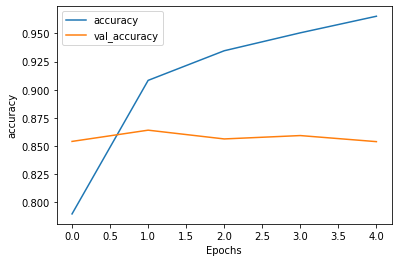

In [31]:
plot_graphs(history,'accuracy')

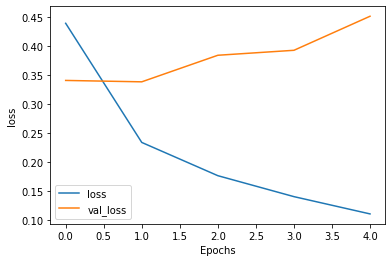

In [32]:
plot_graphs(history, 'loss')

## Evaluating the model

In [33]:
# defining loss and acuracy
test_loss, test_acc = model.evaluate(test_padded, y_test)
print("Test accuracy: ", test_acc)

25000/25000 [==============================] - 1s 22us/sample - loss: 0.3994 - accuracy: 0.8678
Test accuracy:  0.86784


In [34]:
# predicting on a positive sample
sample_text_to_predict = ["The movie was great. The animation and the graphics was excellent. I would recommend this movie."]
train_sequences = tokenizer.texts_to_sequences(sample_text_to_predict)
pos_padded = pad_sequences(train_sequences, maxlen=max_length, padding = "post", truncating="post")

#  making prediction
prediction = model.predict(pos_padded)
print(prediction)

[[0.9644864]]


In [35]:
# predicting on a negative sample
sample_text_to_predict = ["The movie was horrible. The animation and the graphics were wrost.I would not recommend this movie."]
train_sequences = tokenizer.texts_to_sequences(sample_text_to_predict)
neg_padded = pad_sequences(train_sequences, maxlen=max_length, padding = "post", truncating="post")

#  make prediction
prediction = model.predict(neg_padded)
print(prediction)

[[0.20438854]]
